In [1]:
import requests

# URL of the CSV file on GitHub
url = 'https://raw.githubusercontent.com/cmusam/fortune500/master/csv/fortune500-2019.csv'

# Send a GET request to the URL
response = requests.get(url)

# Save the content to a CSV file on your local machine
with open('fortune500-2019.csv', 'wb') as file:
    file.write(response.content)

print("Dataset downloaded successfully!")


Dataset downloaded successfully!


In [ ]:
from GoogleNews import GoogleNews
import pandas as pd
from datetime import datetime, timedelta

# Load the Fortune 500 dataset
df = pd.read_csv('fortune500-2019.csv')

# Get the list of company names
company_names = df['company'].head(500).tolist()  # Top 500 companies

# Set the date range (past 3 months)
end_date = datetime.today()
start_date = end_date - timedelta(days=90)  # 3 months ago

# Initialize GoogleNews object
googlenews = GoogleNews()
company_news = []

# Function to fetch news for a company
def fetch_news(company, start_date, end_date):
    googlenews.set_lang('en')
    googlenews.set_time_range(start_date.strftime('%m/%d/%Y'), end_date.strftime('%m/%d/%Y'))
    googlenews.search(company)
    news = googlenews.get_texts()  # Get the news headlines
    return news

# Fetch and display news for the top 500 companies
for company in company_names:
    print(f"Fetching news for: {company}")
    news = fetch_news(company, start_date, end_date)
    if news:
        print(f"News for {company}:\n")
        for i, article in enumerate(news, start=1):
            print(f"{i}. {article}")
    else:
        print(f"No news found for {company}.")
    print("\n" + "-"*50 + "\n")



Fetching news for: Walmart
News for Walmart:

1. Walmart Customer Said The Store’s Website Misled Her About A Product She Wanted To Buy
2. Dog attacks 3-year-old in Vancouver Walmart, owner flees scene
3. Dog attacks 3-year-old in Vancouver Walmart, owner flees scene
4. Dog attacks 3-year-old in Vancouver Walmart, owner flees scene
5. Walmart donates to Toys For Tots
6. Walmart Bodycams, Wienermobile Jobs & Unruly Behavior on Royal Caribbean
7. Walmart Employees Are Now Wearing Body Cameras In Some Stores
8. Here’s Why Minnesota Walmart Stores Look Different In The Morning
9. Walmart testing body cameras on employees at some store locations
10. Fear in the Aisles as Walmart Parking Lot Altercation Moves Inside, Sparking Safety Concerns

--------------------------------------------------

Fetching news for: Exxon Mobil
News for Exxon Mobil:

1. Walmart Customer Said The Store’s Website Misled Her About A Product She Wanted To Buy
2. Dog attacks 3-year-old in Vancouver Walmart, owner fle

In [1]:
import pandas as pd
df = pd.read_csv('fortune500-2019.csv')
print(df)


     rank               company  revenue ($ millions)  profit ($ millions)
0       1               Walmart              514405.0               6670.0
1       2           Exxon Mobil              290212.0              20840.0
2       3                 Apple              265595.0              59531.0
3       4    Berkshire Hathaway              247837.0               4021.0
4       5            Amazon.com              232887.0              10073.0
..    ...                   ...                   ...                  ...
495   496  Simon Property Group                5657.9               2440.1
496   497               Navient                5610.0                395.0
497   498         Western Union                5589.9                851.9
498   499        Peabody Energy                5581.8                646.9
499   500          Levi Strauss                5575.4                283.1

[500 rows x 4 columns]


In [2]:
print(df.columns)


Index(['rank', 'company', 'revenue ($ millions)', 'profit ($ millions)'], dtype='object')


In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Step 1: Load your dataset
df = pd.read_csv('fortune500-2019.csv')
# Assuming the 'text' column in the dataset contains the news articles
texts = df['company'].dropna()

# Step 2: Preprocess the text column
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()  # Convert text to lowercase
    words = text.split()  # Split text into words
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return ' '.join(words)

# Apply preprocessing to each article
df['processed_text'] = texts.apply(preprocess_text)

# Step 3: Define the topics you want to classify into
# Create a mapping for the topics (this is just an example for training purposes)
topics = ['Legal', 'Governance', 'Social', 'Reputational Risk', 'Regulatory Risk', 
          'Physical Risk', 'Transition Risk', 'Waste and Water', 'Biodiversity', 'Fossil Fuels']

# For simplicity, let's assume you already have labeled data for each article's topic
# You should ideally label your dataset. Here we'll randomly assign topics for illustration.
import random
df['topic'] = [random.choice(topics) for _ in range(len(df))]

# Step 4: Split the data into training and testing sets
X = df['processed_text']  # Features (processed news articles)
y = df['topic']  # Labels (the topics)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create a pipeline with TF-IDF Vectorizer and Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Step 7: Predict topics for the news articles
sample_news = ["Company X is facing regulatory challenges regarding its new products.", 
               "There are growing concerns about the environmental impact of company Y’s operations."]
processed_sample = [preprocess_text(news) for news in sample_news]
predictions = model.predict(processed_sample)

# Print predicted topics for sample news articles
for news, prediction in zip(sample_news, predictions):
    print(f"News: {news}\nPredicted Topic: {prediction}\n")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\csara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\csara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                   precision    recall  f1-score   support

     Biodiversity       0.11      0.89      0.20         9
     Fossil Fuels       0.10      0.09      0.10        11
       Governance       0.00      0.00      0.00        12
            Legal       0.00      0.00      0.00        10
    Physical Risk       0.20      0.06      0.09        18
  Regulatory Risk       0.00      0.00      0.00         7
Reputational Risk       0.00      0.00      0.00         7
           Social       0.00      0.00      0.00         8
  Transition Risk       0.00      0.00      0.00         6
  Waste and Water       0.00      0.00      0.00        12

         accuracy                           0.10       100
        macro avg       0.04      0.10      0.04       100
     weighted avg       0.06      0.10      0.04       100

News: Company X is facing regulatory challenges regarding its new products.
Predicted Topic: Biodiversity

News: There are growing concerns about the environmental impact 

C:\Users\csara\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\csara\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\csara\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')  # For VADER sentiment analysis

# Step 1: Load your dataset
df = pd.read_csv('fortune500-2019.csv')
texts = df['company'].dropna()

# Step 2: Preprocess the text column
def preprocess_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['processed_text'] = texts.apply(preprocess_text)

# Step 3: Sentiment Analysis using VADER Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)
    compound_score = score['compound']
    
    if compound_score >= 0.05:
        return 'Positive', compound_score
    elif compound_score <= -0.05:
        return 'Negative', compound_score
    else:
        return 'Neutral', compound_score

# Apply sentiment analysis to each article
df['sentiment_label'], df['sentiment_score'] = zip(*df['processed_text'].apply(get_sentiment))

# Step 4: Classify the articles into topics (as already shown)
topics = ['Legal', 'Governance', 'Social', 'Reputational Risk', 'Regulatory Risk', 
          'Physical Risk', 'Transition Risk', 'Waste and Water', 'Biodiversity', 'Fossil Fuels']

# Randomly assigning topics (you should ideally label them yourself)
import random
df['topic'] = [random.choice(topics) for _ in range(len(df))]

# Step 5: Split data into training and testing sets (for classification task)
X = df['processed_text']
y = df['topic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create a pipeline with TF-IDF and Naive Bayes for topic classification
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Step 7: Predict topics and sentiment labels for test data
y_pred = model.predict(X_test)
y_pred_sentiment = df.loc[X_test.index, 'sentiment_label']

# Print the classification report for topics
print("Topic Classification Report:")
print(classification_report(y_test, y_pred))

# Print sentiment analysis results for some sample articles
sample_articles = ["Company X is facing regulatory challenges regarding its new products.", 
                   "There are growing concerns about the environmental impact of company Y’s operations."]

for article in sample_articles:
    sentiment, score = get_sentiment(article)
    print(f"Article: {article}\nSentiment: {sentiment} (Score: {score})\n")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\csara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\csara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\csara\AppData\Roaming\nltk_data...


Topic Classification Report:
                   precision    recall  f1-score   support

     Biodiversity       0.09      0.07      0.08        15
     Fossil Fuels       0.00      0.00      0.00        11
       Governance       0.00      0.00      0.00        15
            Legal       0.00      0.00      0.00        11
    Physical Risk       0.00      0.00      0.00         8
  Regulatory Risk       0.11      0.10      0.11        10
Reputational Risk       0.00      0.00      0.00         8
           Social       0.09      0.86      0.16         7
  Transition Risk       0.00      0.00      0.00         9
  Waste and Water       0.00      0.00      0.00         6

         accuracy                           0.08       100
        macro avg       0.03      0.10      0.03       100
     weighted avg       0.03      0.08      0.03       100

Article: Company X is facing regulatory challenges regarding its new products.
Sentiment: Positive (Score: 0.0772)

Article: There are growing

C:\Users\csara\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\csara\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\csara\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\csara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\csara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\csara\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\csara\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\csara\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and

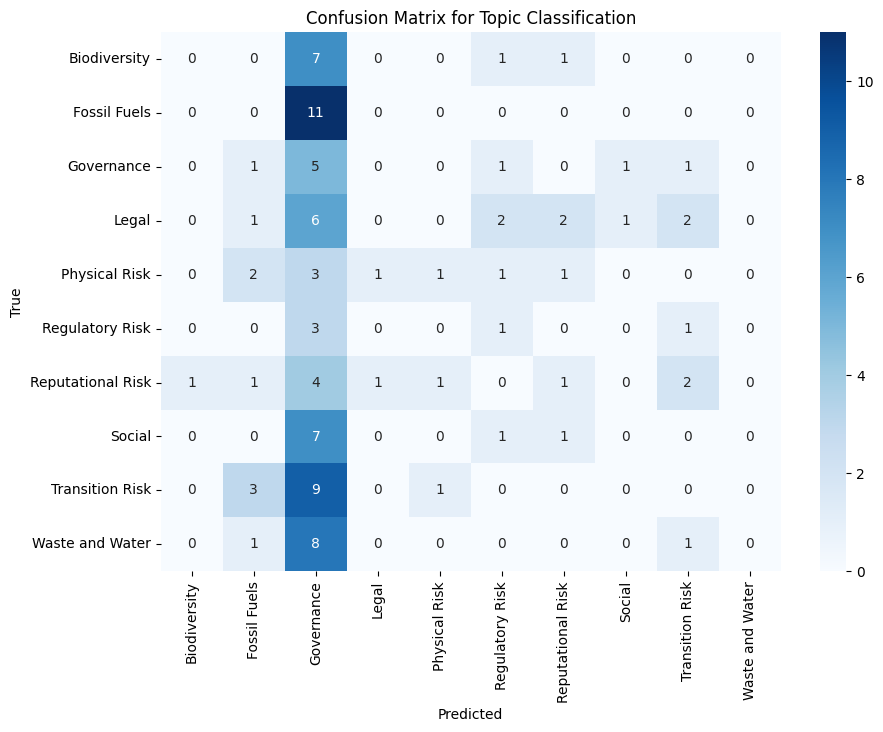

C:\Users\csara\AppData\Local\Temp\ipykernel_1456\338213392.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


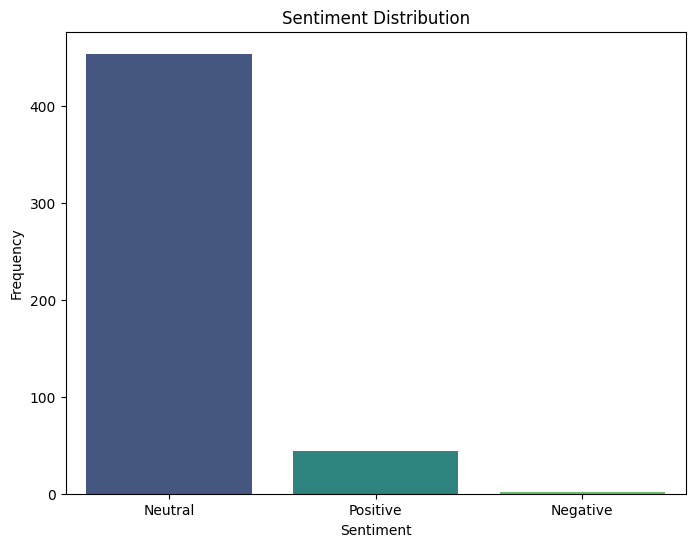

Article: Company X is facing regulatory challenges regarding its new products.
Sentiment: Positive (Score: 0.0772)

Article: There are growing concerns about the environmental impact of company Y’s operations.
Sentiment: Positive (Score: 0.1779)



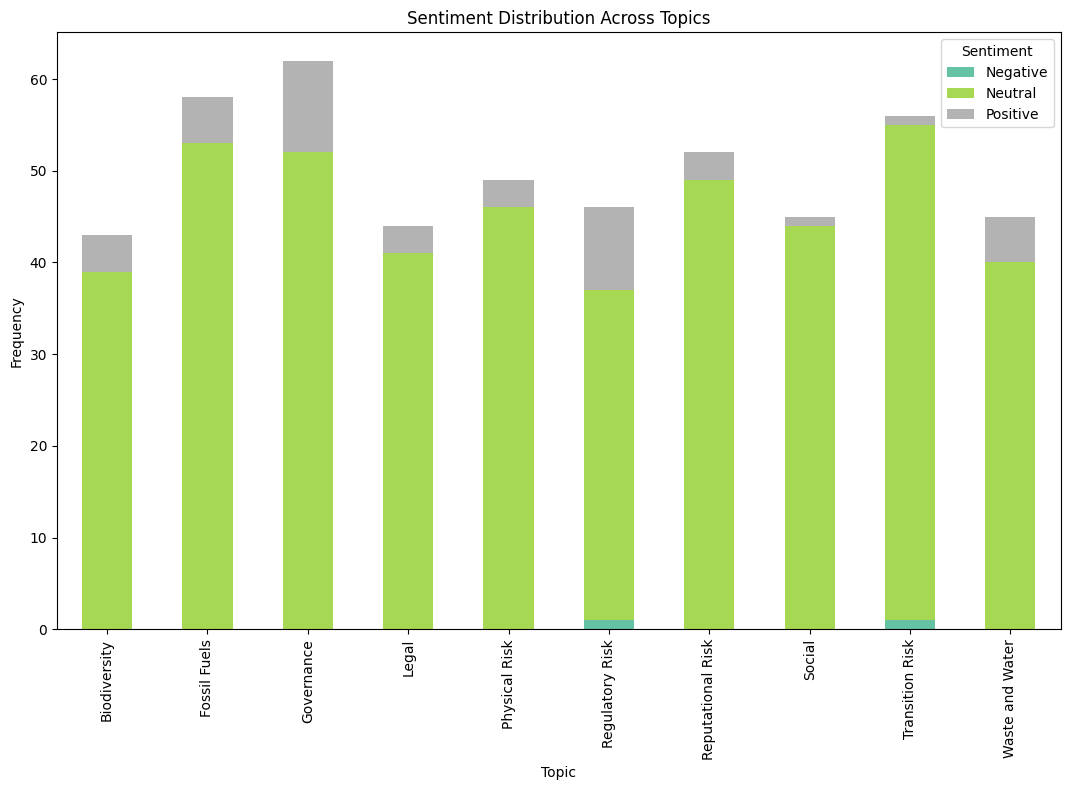

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')  # For VADER sentiment analysis

# Step 1: Load your dataset
df = pd.read_csv('fortune500-2019.csv')
texts = df['company'].dropna()

# Step 2: Preprocess the text column
def preprocess_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['processed_text'] = texts.apply(preprocess_text)

# Step 3: Sentiment Analysis using VADER Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)
    compound_score = score['compound']
    
    if compound_score >= 0.05:
        return 'Positive', compound_score
    elif compound_score <= -0.05:
        return 'Negative', compound_score
    else:
        return 'Neutral', compound_score

# Apply sentiment analysis to each article
df['sentiment_label'], df['sentiment_score'] = zip(*df['processed_text'].apply(get_sentiment))

# Step 4: Classify the articles into topics (as already shown)
topics = ['Legal', 'Governance', 'Social', 'Reputational Risk', 'Regulatory Risk', 
          'Physical Risk', 'Transition Risk', 'Waste and Water', 'Biodiversity', 'Fossil Fuels']

# Randomly assigning topics (you should ideally label them yourself)
df['topic'] = [random.choice(topics) for _ in range(len(df))]

# Step 5: Split data into training and testing sets (for classification task)
X = df['processed_text']
y = df['topic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create a pipeline with TF-IDF and Naive Bayes for topic classification
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Step 7: Predict topics and sentiment labels for test data
y_pred = model.predict(X_test)

# Generate the classification report for topics
topic_report = classification_report(y_test, y_pred, output_dict=True)

# Plot the confusion matrix for topic classification
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix for Topic Classification')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 8: Sentiment Distribution Plot
sentiment_counts = df['sentiment_label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Step 9: Example Sentiment Analysis Results
sample_articles = ["Company X is facing regulatory challenges regarding its new products.", 
                   "There are growing concerns about the environmental impact of company Y’s operations."]

sentiment_results = []
for article in sample_articles:
    sentiment, score = get_sentiment(article)
    sentiment_results.append((article, sentiment, score))

# Display sentiment results
for article, sentiment, score in sentiment_results:
    print(f"Article: {article}\nSentiment: {sentiment} (Score: {score})\n")

# Step 10: Sentiment Analysis - Sentiment vs Topic visualization (optional)
# Let's visualize sentiment distribution for each topic
topic_sentiment = df.groupby('topic')['sentiment_label'].value_counts().unstack().fillna(0)

topic_sentiment.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set2')
plt.title('Sentiment Distribution Across Topics')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.legend(title='Sentiment', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
